In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [38]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
print(df.head())

   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


In [39]:
#EDA
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [40]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [42]:
df.shape

(10000, 12)

In [43]:
 df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

In [44]:
#its clearly imbalance dataset and its obvious also less no of people should leave the platform as its good for business


In [47]:
country_replacements = {'Germany': '0', 'France': '1', 'Spain': '2'}
df['country'] = df['country'].replace(country_replacements)

# Change value in gender column
gender_replacements = {'Female': '0', 'Male': '1'}
df['gender'] = df['gender'].replace(gender_replacements)

# Verify the changes
print(df)

      customer_id  credit_score country gender  age  tenure    balance  \
0        15634602           619       1      0   42       2       0.00   
1        15647311           608       2      0   41       1   83807.86   
2        15619304           502       1      0   42       8  159660.80   
3        15701354           699       1      0   39       1       0.00   
4        15737888           850       2      0   43       2  125510.82   
...           ...           ...     ...    ...  ...     ...        ...   
9995     15606229           771       1      1   39       5       0.00   
9996     15569892           516       1      1   35      10   57369.61   
9997     15584532           709       1      0   36       7       0.00   
9998     15682355           772       0      1   42       3   75075.31   
9999     15628319           792       1      0   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1

In [48]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [49]:
df.info() # still after replacing 0s and 1s with  in place of gender and country with 0 ,1, 2 dtypes remains same

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [50]:
df['country'] = pd.to_numeric(df['country'])
df['gender'] = pd.to_numeric(df['gender'])

In [52]:
df.info() # now every data type is int because xgboost works with int only

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  int64  
 3   gender            10000 non-null  int64  
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [55]:
# removing unnecessary columns like customer_id

df2 =df.drop(columns=['customer_id'] , axis  = 1)

In [56]:
df2

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,772,0,1,42,3,75075.31,2,1,0,92888.52,1


<Axes: >

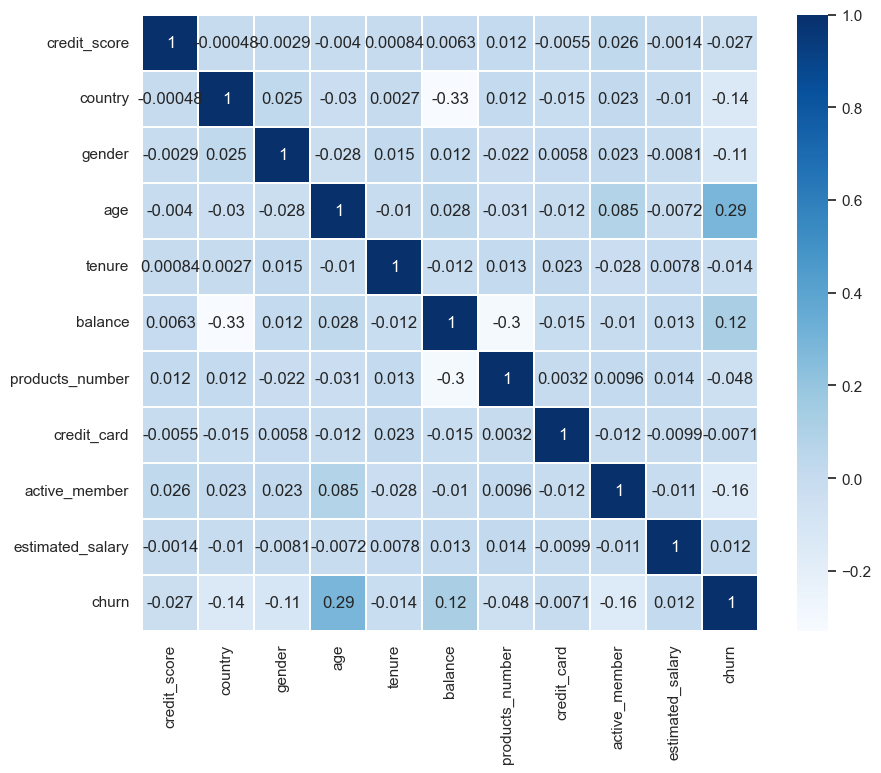

In [65]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(df2.corr() ,  linewidths=.1, annot=True,square = True,  cmap = 'Blues')

In [125]:
churned_customers = df2[df2['churn'] ==1]

In [135]:
churned_customers[['balance','churn']].sort_values(['balance'])

,balance,churn
0,0.00,1
4911,0.00,1
4927,0.00,1
4946,0.00,1
4997,0.00,1
...,...,...
138,213146.20,1
6717,216109.88,1
8733,222267.63,1
3280,238387.56,1


<Axes: xlabel='churn', ylabel='balance'>

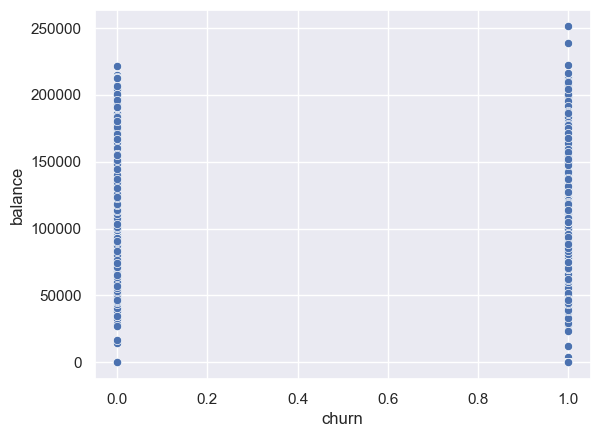

In [142]:
sns.scatterplot(x= 'churn', y = 'balance' , data = df2)

<Axes: xlabel='churn', ylabel='balance'>

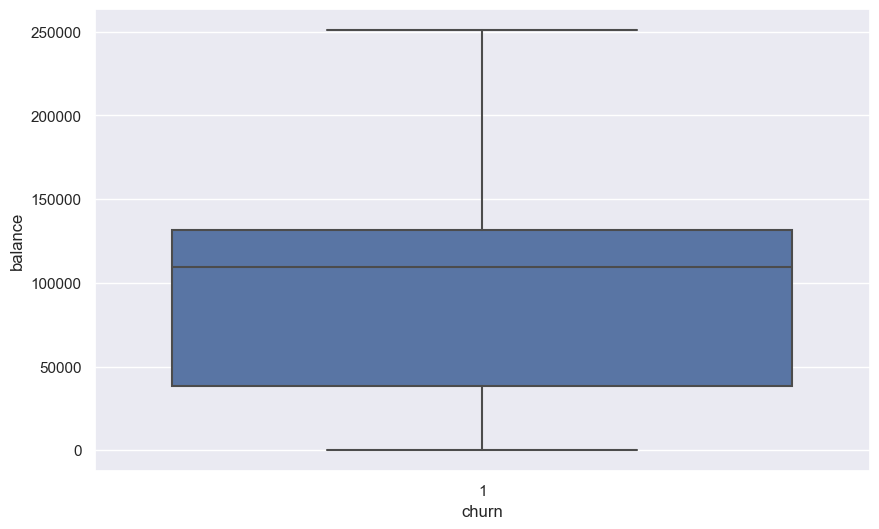

In [132]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='balance', data=churned_customers)

# Majorly customers having balance between 4000 and1200 have higher chances

In [66]:
#We cant drop any of the columns as the correlation bw them is less than 0.5 in each case

In [72]:
#now splitiing data into training anda validation
X = df2.iloc[: ,0:10]
y = df2['churn']

In [105]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=7)

# Decision tree using grid search CV for best accuracy

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [83]:
params = {
   'n_estimators' :[50,100,150,200,300],
    'criterion' : ['gini' ,'entropy'],
    'max_depth' : [3,6,5,10,20,30]
    
}

In [86]:
grid_search = GridSearchCV(estimator = rf, param_grid = params , scoring = 'accuracy' ,cv =5)

In [87]:
grid_search.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 5, 10, 20, 30],
                         'n_estimators': [50, 100, 150, 200, 300]},
             scoring='accuracy')

In [88]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 300}

In [89]:
grid_search.best_score_

0.86425

In [90]:
y_pred = grid_search.predict(X_test)

In [95]:
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 86.45 %


# Using XGBClassifer

In [96]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred2 = xgb_model.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred2)*100, "%")

Accuracy Score : 85.15 %


# Using Decision tree

In [97]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred3 = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred3)*100, "%")


Accuracy Score : 78.25 %


Text(0.5, -4.150000000000002, 'Predicited value')

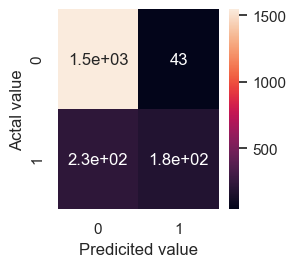

In [113]:
plt.figure(figsize=(2.6,2.6))
sns.heatmap(confusion_matrix(y_test,y_pred) , annot = True)
plt.ylabel('Actal value')
plt.xlabel('Predicited value')
 


In [120]:
confusion_matrix(y_test,y_pred)

array([[1546,   43],
       [ 228,  183]], dtype=int64)

# FOr random forest

In [115]:
precision_score(y_test,y_pred)

0.8097345132743363

# For Xgboost

In [118]:
precision_score(y_test, y_pred2)

0.7065217391304348

# For decision tree

In [119]:
precision_score(y_test, y_pred3)

0.47235023041474655

# CLearly model random forest is preferred because the accuracy and precision in this case is best for random forest classifier